# Loterias modernas en Cumaná - Venezuela

   Se ha hecho muy popular la ejecucion de loterias artesanales, como una alternativa para mejorar la condición economica de algunos cumanaces, las celebraciones de estas, estan llenas de concursos, regalos y sorpresas, amenizdos en algunos casos con música en vivo. Este corto estudio pretende analizar su funcionamiento, las posibilades de ganarla y un prematuro estudio finaciero; me gustaria aclarar, que mi motivación es estritamente funcional, buscando la evolucionar este sistema a una herramienta de desarrollo, basadome en su origen y en las capacidades del mismo para solucionar problematicas.
### Librerias

In [1]:
from src import toggle_cell_code as tcc
#from src import librarys
from itertools import combinations
from math import factorial
from os import scandir, getcwd
import re
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Introduccion

Segunla infomación consultada, el primer registro de una loteria se remonta siglro II AC y sirbieron para finaciar la construcción de la muralla china, los romanos la usaban como un medio para repartir entre los invitados regalos durante una fiesta, tenomos una reseña biblica que sugiere la repartición de tierra usando la suerte como criterio de selección (Numeros 26: 52 - 56) otros citas donde se usa la cuerte como criterio de selección estan Jonás 1:7-17 y en porvercios 18:18 *La suerte pone fin a los pleitos, Y decide entre los poderosos.* La version antigua del juego tal como lo conocemos actualmente data del siglo XV, fue celebrada en 1446 por Margaret van Eyck, viuda del pintor flamenco; si embargo la primera a nivel estatal fue organizada por la reina Isabel I de Inglaterra en 1567 para financiar la modernización de la armada. 

Actualmente, en la ciudad de Cumaná desde enero del 2022, se celebran loterias en toda la ciudad, y a modo informativo para la pobración usaremos un poco de matematicas para dar luces sobre el sistema en su totalidad.

Considerarmos aspectos como:

la cantidad de cartones (polibes conbinaciones),
la cantidad de tablas (conjunto de 6 cartones),
la distribucion de probabilidad de llenar de 1 a 3 cartones,
hacer pruebas con distribuciones normales y no normale en la aparicion de las fichas.
De esta manera centamos la bases para un analisis funcional de la loterias.

Primero evaluaremos como incide el numero de fichas del juego sobre el numero de cartones, seguido de una explicacion de como simularemos una loteria variando difetentes parametros documentando los resultados para usar luego en el analisis, proseguiremos con la representacion de tales datos y mientras recoletaremos datos de las fichas cantada en el juego como tal para, posteriormente, ajustar nuestras simulaciones, seguido comentaremos superficialmente la parte financiera del juego y por ultimo, usando esta informacion, incluiremos un analisis funcional a modo de conclusión.

# Inferencia de las fichas vs el números de cartones o tablas.

Podemos usar la combinatoria para `contar` el número de cartones, usando la ecuacion de combinaciones sin repeticion, 

$$C^{n}_{r} = \binom{n}{r} = \frac{n!}{r!(n-r)!}$$

donde n es el numero total de fichas y r en numero de fichas de cada carton. Para nuestro caso sabemos que cada carton contiene 8 fichas y deseamos saber cuantas combianciones tenemos si nuestro número total de fichas (`nFichas`) va de 15 a 80 fichas.

Pero antes hagamos un pequeño ejemplo, vamos a generar unas distribuciones sin repeticion con la herramientas `combinations` de la libreria `itertools`.

**Nota**: Debido a los recursos computaciones, vamos a representar muestras pequeñas

Primero, si contamos con una muestras de 4 elementos [a,b,c,d,e] y queremos saber cuantas combinaciones e 2 elementos tenemos  tenemos sin repetir ningun conjunto facilmente vemos que tenemos:

- [a,b]  ;  [a,c]  ;  [a,d]  ;  [a,e]

- [b,c]  ;  [b,d]  ;  [b,e]

- [c,d]  ;  [c,e]

- [d,e]

un total de 10 combinaciones, revisemos con el codigo la combinacion propuesta:


In [2]:
tcc.toggle_cell_code("combinaciones")

from itertools import combinations
from math import factorial

list(combinations(["a","b","c","d","e"],2))

Codigo

[('a', 'b'),
 ('a', 'c'),
 ('a', 'd'),
 ('a', 'e'),
 ('b', 'c'),
 ('b', 'd'),
 ('b', 'e'),
 ('c', 'd'),
 ('c', 'e'),
 ('d', 'e')]

Si queremos el numero exacto de combinaciones tenemos en nuestra combiancion, definimos la ecuacion anterior colocamos el número de elementos totales (n) y el número de lementos que conforma el grupo (r).

In [3]:
tcc.toggle_cell_code("combinatoria")

def numComb (n,r):
    return factorial(n)/(factorial(r)*factorial(n-r))

numComb(5,2)


Codigo

10.0

Veamos otro ejemplo un poco mas grande, combinemos  3 elementos de un cojunto de 7 (n =7, r = 3)

In [6]:
tcc.toggle_cell_code("combinato")

comb = combinations("1234567",3)
print(f'El numero de combinaciones es de {len(list(comb))} combinaciones')
comb = combinations("1234567",3)
print(list(comb))

numComb(7,3)

Codigo

El numero de combinaciones es de 35 combinaciones
[('1', '2', '3'), ('1', '2', '4'), ('1', '2', '5'), ('1', '2', '6'), ('1', '2', '7'), ('1', '3', '4'), ('1', '3', '5'), ('1', '3', '6'), ('1', '3', '7'), ('1', '4', '5'), ('1', '4', '6'), ('1', '4', '7'), ('1', '5', '6'), ('1', '5', '7'), ('1', '6', '7'), ('2', '3', '4'), ('2', '3', '5'), ('2', '3', '6'), ('2', '3', '7'), ('2', '4', '5'), ('2', '4', '6'), ('2', '4', '7'), ('2', '5', '6'), ('2', '5', '7'), ('2', '6', '7'), ('3', '4', '5'), ('3', '4', '6'), ('3', '4', '7'), ('3', '5', '6'), ('3', '5', '7'), ('3', '6', '7'), ('4', '5', '6'), ('4', '5', '7'), ('4', '6', '7'), ('5', '6', '7')]


35.0

Si queremos visualizar como crece este numero de combinaciones para un número fijo de 8 elementos que conforma un grupo, pero cambiando el tamaño del conjunto total.

Codigo

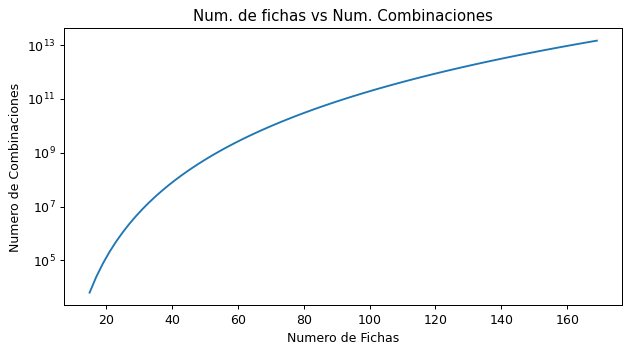

In [9]:
tcc.toggle_cell_code("Inferencia")

lfichas = np.arange(15,170,2)
r = 8  # numero de lementos de cada carton

nComb = [] # Numero de combinaciones para cada elemento de lfichas

for a in lfichas:
    c = numComb(a,r)
    nComb.append(c)
plt.figure(figsize=(8,4), dpi = 90)
plt.plot(lfichas,nComb)
plt.title("Num. de fichas vs Num. Combinaciones")
plt.xlabel("Numero de Fichas")
plt.ylabel("Numero de Combinaciones")
plt.yscale("log")

plt.savefig('media/comb_fichas.png')
#f.savefig("media/hist_comp_wintab_"+str(tabs)+"_carts.png")
plt.show()

Aqui apresiamos el apena 19 fichas tenemos un numero suficiente para genera 75.582 cartones un total de 12.597 de tablas, hay que tener claro que la probabilidad de ganar la loteria depende del numero de cartones este jugando, en otras palabras, 1000 tablas presentes en el momento del sorteo, la probabilidad de ganar el sorteo de una tabla es 1/1000, lo que quiere decir que al aumentar el numero de cartones vamos a aumentar las probabilidad de ganar. no obstante esto se explora mas a fond en otra seccion.

Si tenemos una loteria de 140 fichas con tabla que tiene 6 cartones de 8 fichas cada uno, vamos a tener un total de $4,976 x10^{11}$ Tablas

In [11]:
numComb(140,r)/6 #6 cartones por table

497622297322.5

# Lógica del código 
 
 Vamos a definir un **generador de cartones**, un **antador de cartones** y una **ronda de juego** Con estas tres funciones podremos desarrollar una muestra de mil ronda de juego de manera que podamos ir anotando los resultado de cada ronda de juego.
 

## Generador de cartones
Cada carton constará como un conjunto de dos arreglos, en el primero arreglo tendremos la matriz que representa el carton con combinaciones de fichas segun la cantidad de fichas (`nFichas`) y en le segundo tendremos la matriz de ceros y unos de manera que los $1^{os}$ representen las fichas anotadas segun valla saliento las fichas.

## Anotador de cartones

Segun valla apareciendo cada ficha la funcion ira revisando cada carton, si esta se encuentra en el carton, este cambiara la el valor del segundo arreglo del carton de 0 a 1.

## Ronda del juego

Esta funcion va a resibir el numero de cartones que quermos jugar y generara una distribución aleatoria normal de todas la fichas (Simulando cada ficha que sale en un sorteo) y con este arreglo revisamos nuestros cartones 

# Definiendo Funciones

Vamos necesitar la siguentes librerias, esta ya fueron invocadas anteriormente.

```python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
```

## Generador de cartones

Como la loteria se gana con carton lleno, da lo mismo si es un matriz o un arreglo linear. Posteriormente generaremos n tablas (1 tabla = 6 cartones), esta tabla estará represnetada por una tupla de 6 arrays con 8 elementos cada uno. Todo resulta en la siguentes linea de codigo.


```python
# Genera cartones de 8 fichas a partir de un conjunto de 
# nFichas y los retornas como un arreglo continuo.

def gen_cartones(nfichas,tabs, metodo):# método = "aleatorio","unico","mismos"
    tablas = []
    checks =  []
    if metodo == "aleatorio":
        rng = np.random.default_rng()
        for i in range(tabs):
                tablas.append(rng.choice(range(1, nfichas), size=(6, 8), replace=False))
                
    elif metodo == "unico":
        tablas.append(np.random.default_rng(1).choice(range(1, nfichas), size=(6, 8), replace=False))
        rng = np.random.default_rng()
    
        for i in range(1,tabs):
            tablas.append(rng.choice(range(1, nfichas), size=(6, 8), replace=False))
        
    elif metodo == "mismos":
        for i in range(tabs):
            rng = np.random.default_rng(i)
            tablas.append(rng.choice(range(1, nfichas), size=(6, 8), replace=False))
        
    else:
        print('método = "aleatorio","unico","mismos"')
        
      
    check = np.zeros((tabs,6,8))
    return (tablas, check)
```

Me gustaria resaltar que la base de esta funciones es `rng = np.random.default_rng()` Este generador se basa en un BitGenerator adicional para administrar el estado y generar los bits aleatorios, que luego se transforman en valores aleatorios a partir de distribuciones útiles. Lo que nos permite pasar una lista de elemetos y el sencillamente usa estos elementos tos crear los cartones o arreglos de 8 lementos que seran concatenados a una tupla. Al mismo tiempo se crea otro arreglo con la misma dimension lleno de ceros que nos sevirá como marcador de fichas seleccionadas. Ademas hemos anexados 3 modos diferentes de generar el número de cartones que necesitamos. `aleatorio` que sencillamente genera cartones aleatorios sin repetirse,`unico` que siempre genera la primera tabla igual y las demas aleatorias (Nos permiete evaluar nuestro carton vs miles de cartones aleatorios por cada ronda de juego) y `mismos` siempre generará todos las tablas igual, esto será util para saber cuantas veces ganamos en base e los mismos cartones que es la forma en la que funciona la loterias.

Hagamos una prueba para ver los resultados:


 
    

In [43]:
tcc.toggle_cell_code("catones")

def gen_cartones(nfichas,tabs, metodo):# método = "aleatorio","unico","mismos"
    tablas = []
    checks =  []
    if metodo == "aleatorio":
        rng = np.random.default_rng()
        for i in range(tabs):
                tablas.append(rng.choice(range(1, nfichas), size=(6, 8), replace=False))
                
    elif metodo == "unico":
        tablas.append(np.random.default_rng(0).choice(range(1, nfichas), size=(6, 8), replace=False))
        rng = np.random.default_rng()
    
        for i in range(1,tabs):
            tablas.append(rng.choice(range(1, nfichas), size=(6, 8), replace=False))
        
    elif metodo == "mismos":
        for i in range(tabs):
            rng = np.random.default_rng(i)
            tablas.append(rng.choice(range(1, nfichas), size=(6, 8), replace=False))
        
    else:
        print('método = "aleatorio","unico","mismos"')
        
      
    check = np.zeros((tabs,6,8))
    return (tablas, check)

mismos = table = gen_cartones(50,3, "mismos")
unico = table = gen_cartones(50,3, "unico")
rand = table = gen_cartones(50,3, "aleatorio")

print('----> 10 cartones con 50 fichas donde todos son iguales <----')
display('1er',str(mismos[0][0][0:3]),str(mismos[0][0][3:6])
       ,'2do',str(mismos[0][1][0:3]),str(mismos[0][1][3:6])
       ,'3ro',str(mismos[0][2][0:3]),str(mismos[0][2][3:6]))
print('\n---> 10 cartones con 50 fichas donde el primero es igual y el resto diferente <---')
display('1er',str(unico[0][0][0:3]),str(unico[0][0][3:6])
       ,'2do',str(unico[0][1][0:3]),str(unico[0][1][3:6])
       ,'3ro',str(unico[0][2][0:3]),str(unico[0][2][3:6]))
print('\n-----> 10 cartones con 50 fichas donde todos son diferente <-----')
display('1er',str(rand[0][0][0:3]),str(rand[0][0][3:6])
       ,'2do',str(rand[0][1][0:3]),str(rand[0][1][3:6])
       ,'3ro',str(rand[0][2][0:3]),str(rand[0][2][3:6]))

Codigo

----> 10 cartones con 50 fichas donde todos son iguales <----


'1er'

'[[36 24  2 33 34 21  4 23]\n [15  1 18 40 47  5 10 29]\n [ 8 27 31  3 20 41 13 12]]'

'[[ 9 11 16 43 45 46  6 48]\n [49 25 39 32 26 38 28 17]\n [42 35 44  7 19 37 30 14]]'

'2do'

'[[26 41 28 48 23 46  7 16]\n [39 36 32  4 27 44 35  9]\n [ 2 43  3 19 42 38  1 29]]'

'[[30 22 18 12 24 33 21 15]\n [ 5 11 20 17 49 45  8 10]\n [13 40 25 14 34  6 47 37]]'

'3ro'

'[[ 4 44 46  6  1 32 10 24]\n [41 40 21  2 35  8 15 39]\n [37 38 29 45 14 28 27 34]]'

'[[12 13 19 33 26 49 23 11]\n [31 17  9 36  5 20  3 42]\n [30 25 22  7 47 43 16 48]]'


---> 10 cartones con 50 fichas donde el primero es igual y el resto diferente <---


'1er'

'[[36 24  2 33 34 21  4 23]\n [15  1 18 40 47  5 10 29]\n [ 8 27 31  3 20 41 13 12]]'

'[[ 9 11 16 43 45 46  6 48]\n [49 25 39 32 26 38 28 17]\n [42 35 44  7 19 37 30 14]]'

'2do'

'[[11 35 13 43 30 24 16 15]\n [17 31  6 20 34 44  4 21]\n [ 2 47 46 14 10  1 27 36]]'

'[[37 39 19 45 28 49 41 40]\n [32  5 12 23 42 22 26 48]\n [18 38 29 33  3  9 25  7]]'

'3ro'

'[[38  7 10 14  5 41 33 29]\n [45 15 39 48 17 21 22 27]\n [ 2  9 12 40 24 32 20 34]]'

'[[13 16 26 43 19 31  6  4]\n [23 30 18  8 46 36 35  3]\n [25 37 44 49 42 28 47  1]]'


-----> 10 cartones con 50 fichas donde todos son diferente <-----


'1er'

'[[21 46 12 37 31 44 36 22]\n [41 27 48 25 30  3 49 35]\n [34 20 11 33 19 40 43  4]]'

'[[16 29  2 24 45  6  1 28]\n [39 10  8 26  5 13 18 14]\n [ 7 38 17 42 15 47 23 32]]'

'2do'

'[[19 32  6 28 47 40 46 21]\n [15 23 29  9 24 26 11 10]\n [49 12 16 27 17  4  8 30]]'

'[[13 18 37 25  2  3  1 36]\n [41 31 33 22 34 48 45 43]\n [35 20  7 44  5 38 42 14]]'

'3ro'

'[[13  5 39  8  6 28 18 34]\n [49  4  7 22 44 19 10 40]\n [35 42 37  9 31 45 46 38]]'

'[[15 47  2 20 17  1 27 32]\n [30 33 21  3 11 29 25 43]\n [36 16 41 24 26 23 14 12]]'

## Anotador de cartones

A pesar que no visaulizamos en la prueva anterior la tabla de marcado generado por `gen_cartones(nfichas,tabs, metodo)` retornado en la columna 1 del valor retornado, Esta parte va a ser vital para anotar las fichas cantadas del carton. recordemos que una cosa es reconocer la ficha cantada en el carton y otra la de marcar la ficha. 

Primero vamos a establecer las condiciones para ganar el sorteo, en este caso llenar 1, 2 o 3 cartones.

```python
def checker(mCards, nWin ,index):# ncards 1 a 6 cartones
    # En caso de tener varias tablas
    loterias = 0
    # Solo una tabla
   
    for card in mCards[index]:
        
        valor, count = np.unique(card,return_counts=True)
                       
        if ((count[0] == 8) & (valor[0]==1 )): # Numero de fichas en el carton
            loterias = loterias + 1
            #print(loterias)
            
    if (loterias >= nWin):
        return 1
    
    return 0
        
```
nuestro marcador rellena con 1  nuestro arreglo lleno de ceros cuando la ficha esta en nuestros cartones, luego, `checker(mCards, nWin ,index)`revisa nuestro arreglo de elementos marcados con 1 y busca si hemos llenado los cartones necesarios para ganar y retrona un true en caso que se cumpla la condicion de **lotería** 

```python
# Buscar maneras de integrar y tomar en cuenta como optimizar
#    -Empezar a chekear luego de la 8va ficha anotada
#    -En el chekeador  podrias evitar revisar los catonoes con loteria
#    en caso de tener mas de un win.


def marker(mcards, ficha,index):
    x,y = np.where(mcards[0][index]==ficha)
    if (len(x) != 0):
        mcards[1][index][x,y] = 1
        return True
    else:
        return False
    
```   
Me interezó tener un reporte del carton que ganó por eso incluí la siguiente funcion.

```python
def cardWin(mCards,index):# ncards 1 a 6 cartones
    # En caso de tener varias tablas
    cardwin = []
    counter = 0
    # Solo una tabla
   
    for card in mCards[1][index]:
        #print(card)
        valor, count = np.unique(card,return_counts=True)
                       
        if ((count[0] == 8) & (valor[0]==1 )): # Numero de fichas en el carton
            cardwin.append(mCards[0][index][counter])
           # print(card)
            
        counter += 1
        #print(counter)
    
    
    return cardwin
```

Aqui vamos a ingresar la tabla que completó las condiciones para ganar, junto con el indice del mismo, y entre los cartones no extrae solo el carton ganador de la tabla. Dependiendo del caso , devolvara 1, 2 o 3 cartones.

## Ronda del juego

Es la función que usará todo lo anterior para simular un sorteo. 

```python
## jugar ronda para un carton
## incluir el numero de ficha y de cartones

def ronda_de_juego(ntabs,wins,numFichas):
    tabs = ntabs
    nfichas = numFichas
    lFichas = random.sample(range(1,nfichas+1), nfichas)# Lista de fichas
    cuentaFichas = 0
    cuentaCheck = 0
    loteria = 0
    table = gen_cartones(nfichas,tabs, "unico") # True es el mismo carton
    
    for ficha in lFichas:
        cuentaFichas += 1
       
        for i in range (tabs):

            if marker(table, ficha,i):
                cuentaCheck += 1

            if (cuentaCheck >= 8):
                loteria = checker(table[1], wins,i )

            if (loteria == 1):
                #print (table)
                return (cuentaFichas,cardWin(table,i)) # Retorno el carton ganador
```
Al final nos retorna el numero de fichas necesarias para ganar una loteria y el o los cartones ganadores.

Hagamos una pequeña prueva para aprecia lo que hemos hecho.

In [44]:
tcc.toggle_cell_code('Ronda')


## Chequeador de fichas en el carton

def checker(mCards, nWin ,index):# ncards 1 a 6 cartones
    # En caso de tener varias tablas
    loterias = 0
    # Solo una tabla
   
    for card in mCards[index]:
        
        valor, count = np.unique(card,return_counts=True)
                       
        if ((count[0] == 8) & (valor[0]==1 )): # Numero de fichas en el carton
            loterias = loterias + 1
            #print(loterias)
            
    if (loterias >= nWin):
        return 1
    
    return 0
        
## Marcador del carton que tiene la ficha    

# Buscar maneras de integrar y tomar en cuenta como optimizar
#    -Empezar a chekear luego de la 8va ficha anotada
#    -En el chekeador  podrias evitar revisar los catonoes con loteria
#    en caso de tener mas de un win.



def marker(mcards, ficha,index):
    x,y = np.where(mcards[0][index]==ficha)
    if (len(x) != 0):
        mcards[1][index][x,y] = 1
        return True
    else:
        return False

### Devuelve el carton ganador    
    
def cardWin(mCards,index):# ncards 1 a 6 cartones
    # En caso de tener varias tablas
    cardwin = []
    counter = 0
    # Solo una tabla
   
    for card in mCards[1][index]:
        #print(card)
        valor, count = np.unique(card,return_counts=True)
                       
        if ((count[0] == 8) & (valor[0]==1 )): # Numero de fichas en el carton
            cardwin.append(mCards[0][index][counter])
           # print(card)
            
        counter += 1
        #print(counter)
    
    
    return cardwin

## Ronda de juego

## jugar ronda para un carton
## incluir el numero de ficha y de cartones

def ronda_de_juego(ntabs,wins,numFichas):
    tabs = ntabs
    nfichas = numFichas
    lFichas = random.sample(range(1,nfichas+1), nfichas)# Lista de fichas
    cuentaFichas = 0
    cuentaCheck = 0
    loteria = 0
    table = gen_cartones(nfichas,tabs, "unico") # True es el mismo carton
    
    for ficha in lFichas:
        cuentaFichas += 1
       
        for i in range (tabs):

            if marker(table, ficha,i):
                cuentaCheck += 1

            if (cuentaCheck >= 8):
                loteria = checker(table[1], wins,i )

            if (loteria == 1):
                #print (table)
                return (cuentaFichas,cardWin(table,i)) # Retorno el carton ganador
            
            
            

Codigo

In [51]:
a =ronda_de_juego(10,1,50)

print(f'La tabla ganador es {a[1]} y necesitó {a[0]} fichas para ganar')

La tabla ganador es [array([ 8, 49, 23, 33,  3, 37,  5,  9])] y necesitó 31 fichas para ganar


# Corridas

Ya tenemos nuestras maquinas simuladoras del juego de loteria, y provamos cun la siguente configuracion.

```python
# Iniciamos el data frame
df_loteria = pd.DataFrame(columns = ["numTablas", "numFichas", "distFichas"
                                     , "fichasToWin","tabToWin"])
# Configuración

NdeFichas = 80
nwin = 1
nTab = 5 # 6 cartones
dist = "uniform"
rondas = 20

for i in range(rondas):
    temp_ftw = ronda_de_juego(nTab,nwin,NdeFichas)[0] # numero de cartones llenos y Numero de fichas 
    temp_ttw = ronda_de_juego(nTab,nwin,NdeFichas)[1] #           "                       "
    data = pd.Series({"numTablas":1,"numFichas":NdeFichas
                      , "distFichas":dist, "fichasToWin":temp_ftw
                      ,"tabToWin":temp_ttw})
    
    
    df_loteria = pd.concat([df_loteria,data.to_frame().T],ignore_index=True)
    
df_loteria.to_csv(r'data/df_loteria.csv', header = True, index = False)  
```

Nuestro primer interes es revisar como influye el numero de fichas en solo una tabla, luego La segunda configuacion queria averiguar como unfluye el número de cartones en el la cantida de fichas necesarias para ganar fijando el numero de fichas en 80, en nuestra tercera configuración el interes es saber cuantas veces veces gana mi tabla en comparacion con el de los otros, fijando el número de fichas y el número de cartones. Todo esto se puede resumir en la siguiente tabla.

|    Configuración   |      primera      |      Segunda     |      Tercera     |      Cuarta       |
|:------------------:|:-----------------:|:----------------:|:----------------:|:-----------------:|
|     NumdeFichas    | [50-170] 10 en 10 |        80        |        80        |        80         |
| Numwin(para ganar) |  [1,2,3] seed(1)  |  [1,2,3] (único) |  [1,2,3] (mismo) |  [1,2,3] (mismo)  |
|     Numcartones    |         1         | [5-30] de 5 en 5 |        100       |        100        |
|   distribuciones   |      Uniforme     |     Uniforme     |     Uniforme     |   SeudoUniforme   |
|     NumdeRondas    |  1000 x cada una  |  1000 x cada una | [5000,2000,1000] | [5000,2000,1000]  |

Para la primera el numero fichas cambia de 10 en 10 desde 50 a 170 y para cada cambio se evaluo para 1, 2 y 3 cartones llenos, para la segunda se varía la cantida de cartones, donde solo tenemos el primer carton igual en todas rondas, en la tercera aseguramos jugar siempre con los mismo 100 cartones y la razon por la que se hizo 5000 ronda para un solo carton lleno, 2000 para 2 cartones llenos y 1000 para 3 cartones, se escogio basado en las forma en la que hace el juego de loteria, visto que con un carton lleno se hace 5 sorteos, 2 sorteos con 2 catones llenos y 1 sorteo con 3 cartones llenos.

Todo se almacena en un archivo de registro con las siguientes etiquetas `["numTablas", "numFichas", "distFichas", "fichasToWin","tabToWin"]` que corresponde con las siguens variables


|  "numTablas"  |  **Número de tablas en el juego** |
|:-------------:|:---------------------------------:|
|  "numFichas"  |  **Número de fichas en el juego** |
|  "distFichas" |     **Distribución de fichas**    |
| "fichasToWin" | **La catidad de fichas cantadas** |
|   "tabToWin"  |       **Cartones ganadores**      |

Por error `tabToWin` no contiene la cantidad de cartons necesarios para ganar, por tal motivo para no perder el tiempo de computo, posteriormente se procesará para contar los cartones ganadores y anexar el número de cartones para ganar.

Podemos hacer la corrido en la carpenta`\src\main.py`que contiene todo el codigo.

In [54]:
tcc.toggle_cell_code('orridas')
# Iniciamos el data frame
df_loteria = pd.DataFrame(columns = ["numTablas", "numFichas", "distFichas"
                                     , "fichasToWin","tabToWin"])
# Configuración

NdeFichas = 80
nwin = 1
nTab = 5 # 6 cartones
dist = "uniform"
rondas = 20

for i in range(rondas):
    temp_ftw = ronda_de_juego(nTab,nwin,NdeFichas)[0] # numero de cartones llenos y Numero de fichas 
    temp_ttw = ronda_de_juego(nTab,nwin,NdeFichas)[1] #           "                       "
    data = pd.Series({"numTablas":1,"numFichas":NdeFichas
                      , "distFichas":dist, "fichasToWin":temp_ftw
                      ,"tabToWin":temp_ttw})
    
    
    df_loteria = pd.concat([df_loteria,data.to_frame().T],ignore_index=True)
    
df_loteria.to_csv(r'data/df_loteria.csv', header = True, index = False)  # Convierte el Dataframe en un .csv

Codigo

**En el siguente archivo vamos a revisar los datos adquiridos de las simulaciones.**